## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df1=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')
df= df1.sort_values('Timepoint').groupby('Mouse ID').tail(1)  #Final timepoint dataframe

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average = df1['Tumor Volume (mm3)'].groupby(df1['Drug Regimen']).mean()
median = df1['Tumor Volume (mm3)'].groupby(df1['Drug Regimen']).median()
variance = df1['Tumor Volume (mm3)'].groupby(df1['Drug Regimen']).var()
std_dev = df1['Tumor Volume (mm3)'].groupby(df1['Drug Regimen']).std()
mouse_sem= df1['Tumor Volume (mm3)'].groupby(df1['Drug Regimen']).sem()
summary = pd.merge(average, median, on= 'Drug Regimen', suffixes=(' Mean',' Median'))
summary = pd.merge(summary, variance, on= 'Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'Variance'})
summary = pd.merge(summary,std_dev, on='Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3)':'Std. Dev.'})
summary = pd.merge(summary,mouse_sem, on='Drug Regimen')
summary = summary.rename(columns={'Tumor Volume (mm3) Mean':r'Tumor Volume Mean (mm$^3$)',
                                  'Tumor Volume (mm3) Median':r'Tumor Volume Median (mm$^3$)',
                                  'Tumor Volume (mm3)':'SEM'})
summary.head(30)

,Tumor Volume Mean (mm$^3$),Tumor Volume Median (mm$^3$),Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

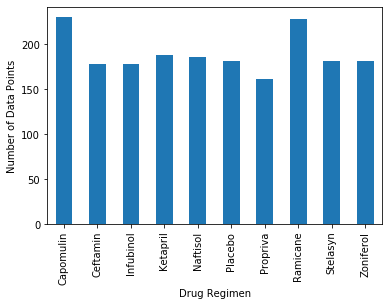

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = df1.groupby(['Drug Regimen']).count()
counts.reindex()
countsplt = counts[['Mouse ID']]
countsplt.plot.bar(legend = False)
plt.ylabel('Number of Data Points')
plt.show()

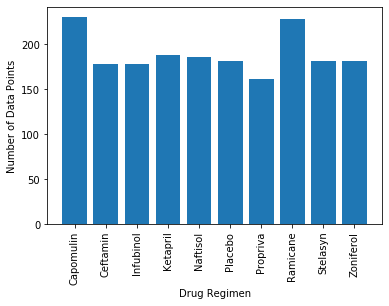

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xval = np.arange(0,len(counts))
plt.bar(xval,counts['Mouse ID'])
plt.xticks(xval, counts.index, rotation="vertical")
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

## Pie plots

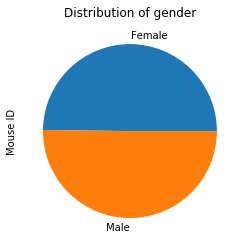

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = df.groupby(['Sex']).count()['Mouse ID']
plot = gender.plot.pie(legend = False)
plt.title('Distribution of gender')
plt.show()
gender.head()

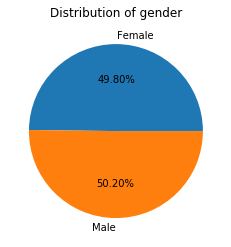

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels = gender.index,autopct="%1.2f%%")
plt.title('Distribution of gender')
plt.show()

## Quartiles, outliers and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
third = 'Infubinol'
Capomulin = df.loc[df['Drug Regimen']=='Capomulin',:]
Ramicane = df.loc[df['Drug Regimen']=='Ramicane',:]
third_drug = df.loc[df['Drug Regimen']==third,:]
Ceftamin = df.loc[df['Drug Regimen']=='Ceftamin',:]
Capo_sort=Capomulin['Tumor Volume (mm3)'].sort_values()
Capo_quartiles = Capo_sort.quantile([.25,.5,.75])
Capo_IQR=Capo_quartiles[0.75]-Capo_quartiles[0.25]
Capo_lower = Capo_quartiles[0.25]-1.5*Capo_IQR
Capo_upper = Capo_quartiles[0.75]+1.5*Capo_IQR
Capo_outliers=Capomulin.loc[(Capomulin['Tumor Volume (mm3)']>Capo_upper) | (Capomulin['Tumor Volume (mm3)']<Capo_lower),:]
Capo_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [17]:
Rami_sort=Ramicane['Tumor Volume (mm3)'].sort_values()
Rami_quartiles = Rami_sort.quantile([.25,.5,.75])
Rami_IQR=Rami_quartiles[0.75]-Rami_quartiles[0.25]
Rami_lower = Rami_quartiles[0.25]-1.5*Rami_IQR
Rami_upper = Rami_quartiles[0.75]+1.5*Rami_IQR
Rami_outliers=Ramicane.loc[(Ramicane['Tumor Volume (mm3)']>Rami_upper) | (Ramicane['Tumor Volume (mm3)']<Rami_lower),:]
Rami_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [18]:
third_sort=third_drug['Tumor Volume (mm3)'].sort_values()
third_quartiles = third_sort.quantile([.25,.5,.75])
third_IQR=third_quartiles[0.75]-third_quartiles[0.25]
third_lower = third_quartiles[0.25]-1.5*third_IQR
third_upper = third_quartiles[0.75]+1.5*third_IQR
third_outliers = third_drug.loc[(third_drug['Tumor Volume (mm3)']>third_upper) | (third_drug['Tumor Volume (mm3)']<third_lower),:]
third_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [19]:
Ceft_sort=Ceftamin['Tumor Volume (mm3)'].sort_values()
Ceft_quartiles = Ceft_sort.quantile([.25,.5,.75])
Ceft_IQR=Ceft_quartiles[0.75]-Ceft_quartiles[0.25]
Ceft_lower = Ceft_quartiles[0.25]-1.5*Ceft_IQR
Ceft_upper = Ceft_quartiles[0.75]+1.5*Ceft_IQR
Ceft_outliers= Ceftamin.loc[(Ceftamin['Tumor Volume (mm3)']>Ceft_upper) | (Ceftamin['Tumor Volume (mm3)']<Ceft_lower),:]
Ceft_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


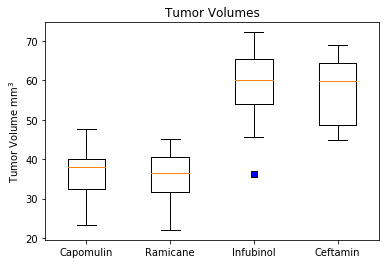

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
# red_square = dict(markerfacecolor='r', marker='s')
ax1.set_title('Tumor Volumes')
ax1.set_ylabel(r'Tumor Volume mm$^3$')
ax1.boxplot([Capomulin['Tumor Volume (mm3)'], Ramicane['Tumor Volume (mm3)'],third_drug['Tumor Volume (mm3)'],Ceftamin['Tumor Volume (mm3)']],flierprops=dict(markerfacecolor='b', marker='s'))
plt.xticks([1, 2, 3,4], ['Capomulin', 'Ramicane',third,'Ceftamin'])
plt.show()

## Line and scatter plots

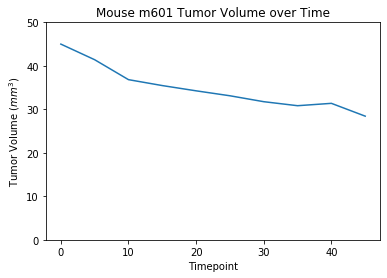

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_mice=df1.loc[df1['Drug Regimen']=='Capomulin']
mouse = 'm601'
s185=capo_mice.loc[capo_mice['Mouse ID']==mouse]['Tumor Volume (mm3)']
xval = np.arange(0,len(s185))
xval = xval*5
plt.plot(xval,s185)
plt.xlabel('Timepoint')
plt.ylabel(r'Tumor Volume $(mm^3)$')
plt.title(f'Mouse {mouse} Tumor Volume over Time')
plt.ylim(0,max(s185)+5)
plt.show()

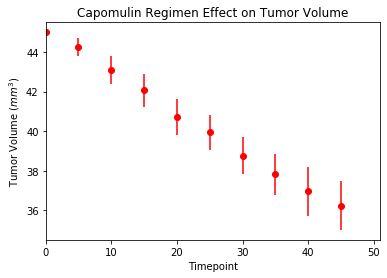

In [13]:
capo_time = capo_mice.groupby('Timepoint').mean()['Tumor Volume (mm3)']
capo_time_error = capo_mice.groupby('Timepoint').sem()['Tumor Volume (mm3)']

fant,nb=plt.subplots()
nb.errorbar(capo_time.index,capo_time,capo_time_error, fmt ='o', color='red')
nb.set_xlim(0, len(capo_time)*5 + 1)
nb.set_xlabel("Timepoint")
nb.set_ylabel(r"Tumor Volume $(mm^3)$")
nb.set_title('Capomulin Regimen Effect on Tumor Volume')
plt.show()

Text(0, 0.5, 'Mice Alive')

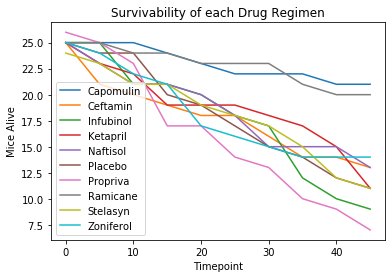

In [43]:
df2 = df1.groupby(['Drug Regimen','Timepoint']).count()['Mouse ID']
df3=df2.unstack(0)
df3.plot(legend= True)
plt.legend(loc='best')
plt.title('Survivability of each Drug Regimen')
plt.ylabel('Mice Alive')

The correlation is 0.84.


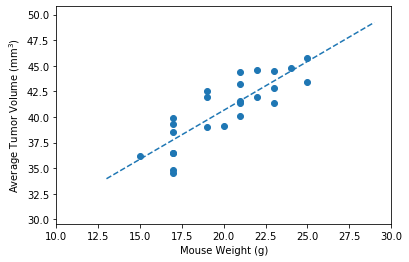

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_averages=capo_mice.groupby('Mouse ID').mean()
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_averages['Weight (g)'],capo_averages['Tumor Volume (mm3)'])
correlation = st.pearsonr(capo_averages['Weight (g)'],capo_averages['Tumor Volume (mm3)'])
print(f'The correlation is {round(correlation[0],2)}.')
plt.scatter(capo_averages['Weight (g)'],capo_averages['Tumor Volume (mm3)'])
xval = np.arange(min(capo_averages['Weight (g)'])-2,max(capo_averages['Weight (g)'])+6,4)
fit = slope * xval + intercept
plt.plot(xval,fit,"--")
plt.xlabel('Mouse Weight (g)')
plt.ylabel(r'Average Tumor Volume (mm$^3$)')
plt.ylim(min(capo_averages['Tumor Volume (mm3)'])-5,max(capo_averages['Tumor Volume (mm3)'])+5)
plt.xlim(min(capo_averages['Weight (g)'])-5,max(capo_averages['Weight (g)'])+5)
plt.show()

In [15]:
print(f'Linear Regression Model is y={round(slope,2)}x+{round(intercept,2)}')

Linear Regression Model is y=0.95x+21.55
